## Part 1: Data Loading and Initial Exploration (15 pts)

The data for this project is stored in the `data` folder in your repositories, in the `SOTU.csv` file. The data file is structured as a CSV with columns for president name, speech text, year, and word count in the speech. 

In this section you will:

1. Import the data into a pandas dataframe
2. Perform exploratory data analysis (EDA) including specifically:
- Analyze the number of speeches per president
- Analyze the number of speeches per year
- Analyze the word count distribution
- Analyze the word count distribution accross years using a rug plot
- Analyze the average word count per president
3. Write commentary on your findings

First, create the `conda` environment with the provided yaml file. Note, it's not unusual for it to take ~15 minutes for the environment to fully install.

### Read Data

In [16]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [17]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity
# the below cell is what the output should look like

In [18]:
sou = pd.read_csv('data/SOTU.csv')
sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


### Exploratory Data Analysis

Replicate the plots below using the hints specified. For each plot, provide some commentary describing the results/anything interesting you might see.

#### Number of Speeches per President

In [19]:
# Hint - use value_counts() on the President column
# Hint - sort in order of dataframe

pres_count = sou['President'].value_counts()
pres_order = sou['President'].unique()
pres_count = pres_count.reindex(pres_order)
pres_count.head()

President
Joseph R. Biden       4
Donald J. Trump       4
Barack Obama          8
George W. Bush        8
William J. Clinton    8
Name: count, dtype: int64

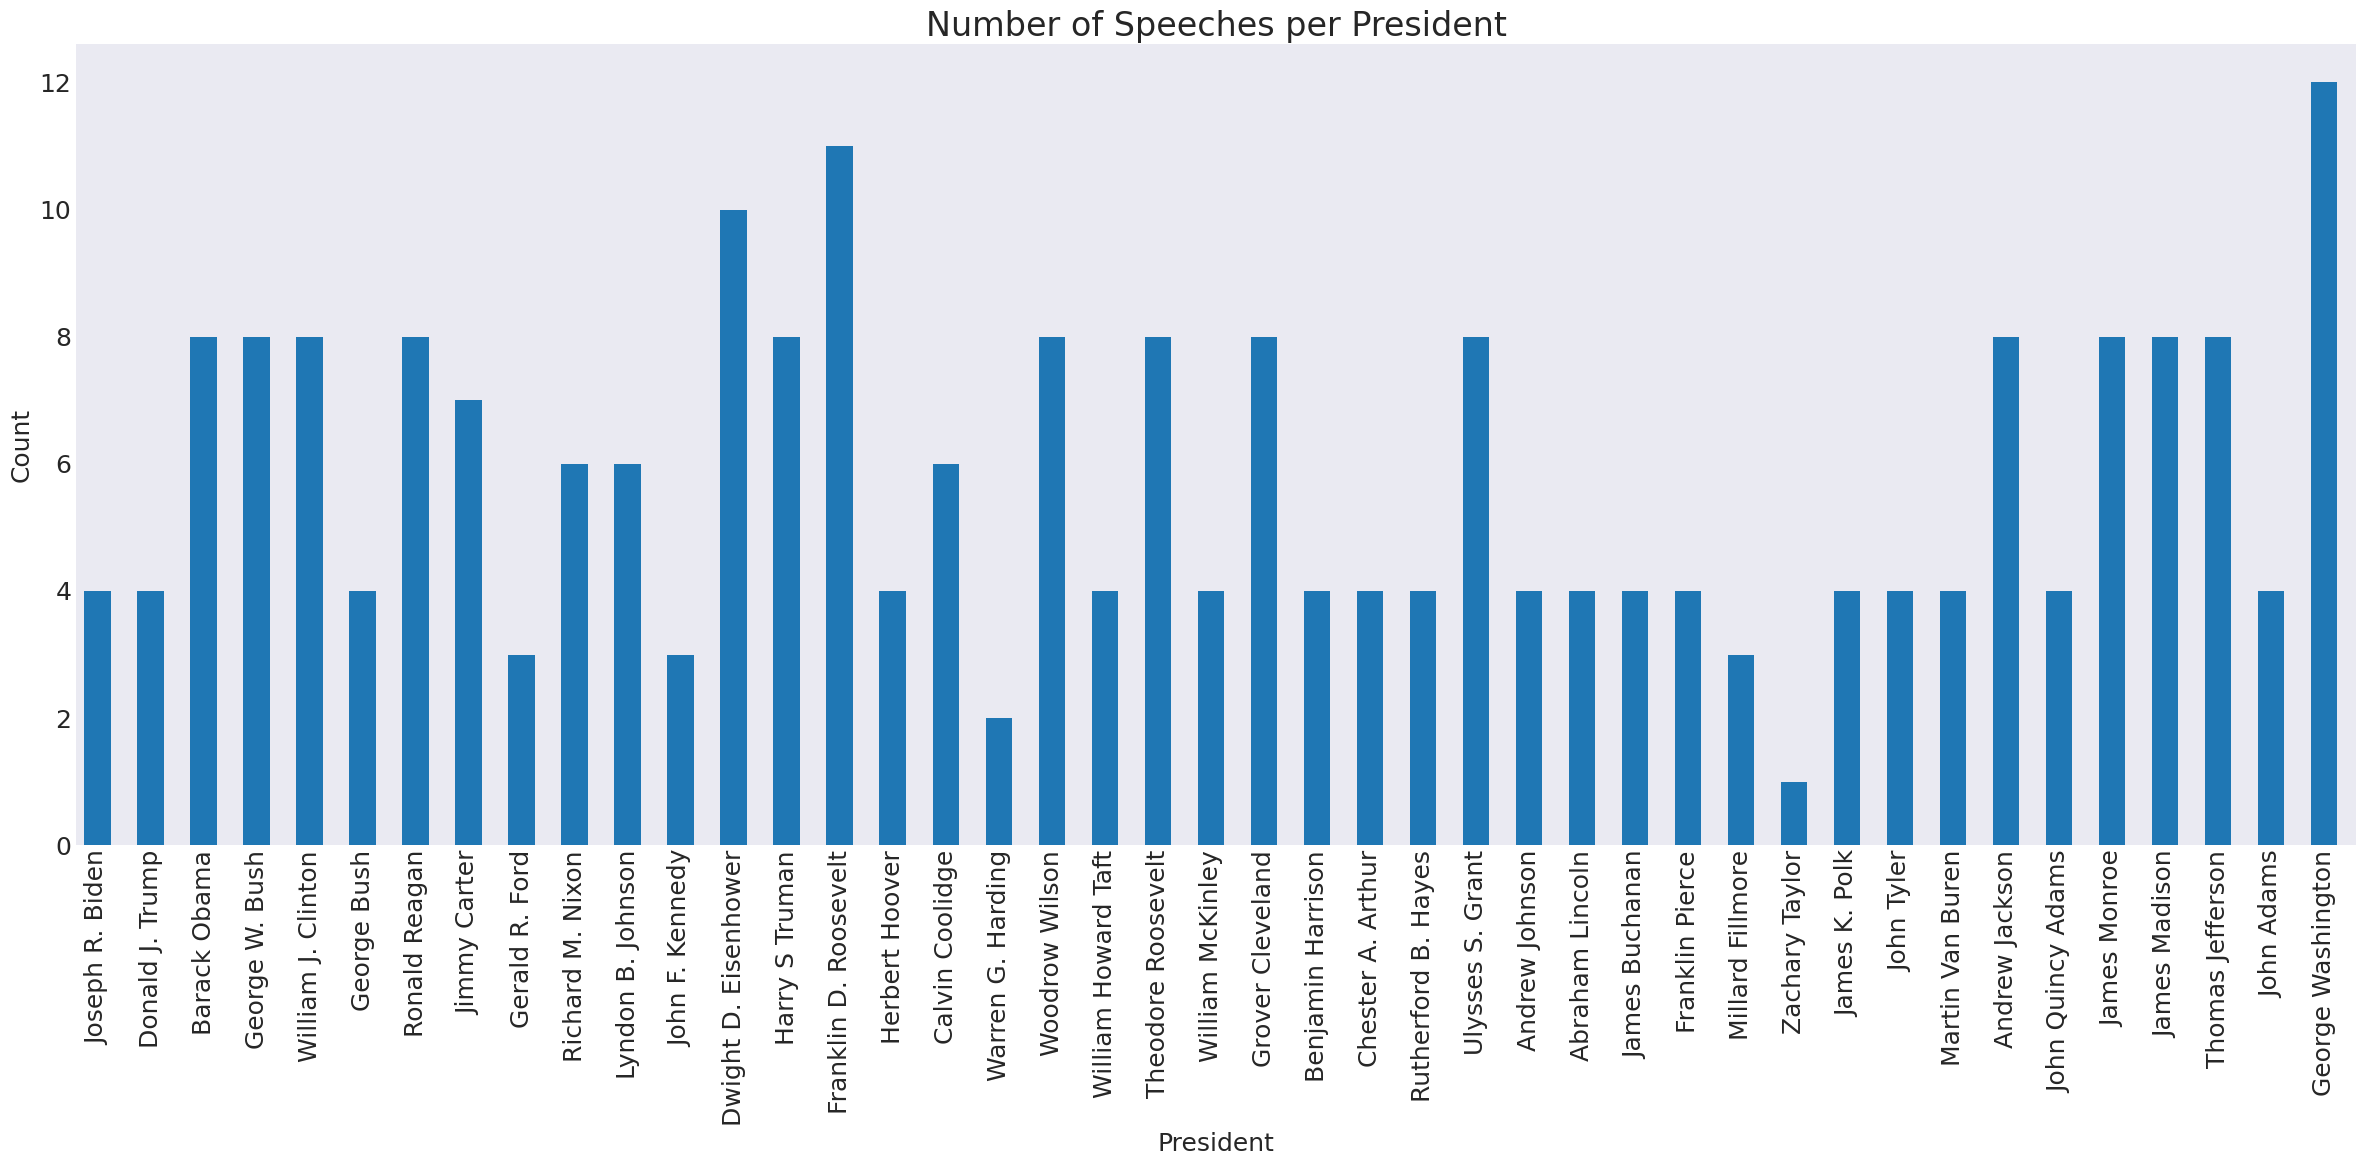

In [20]:
# Plot 
# Hint - use the .plot() method for Pandas Series, make sure all presidents show up on x-axis
plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (24,12))
plt.bar(pres_order, pres_count, width = 0.5)
plt.xlabel('President')
plt.xlim(-0.4, len(pres_order) - 0.4) 
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Number of Speeches per President', fontsize = 24)
plt.tight_layout();

#### Number of Speeches per Year

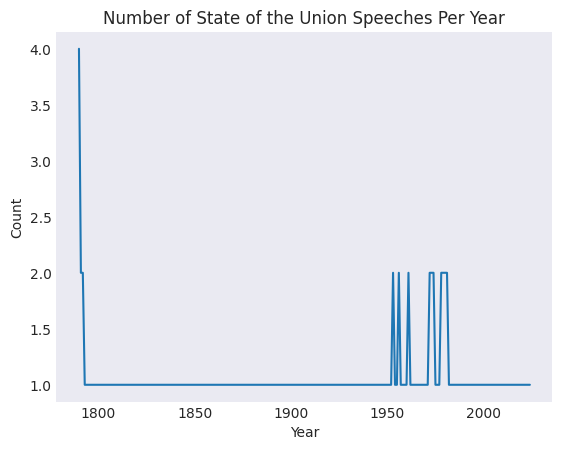

In [21]:
# Hint - Use value counts and sort by years

plt.rcParams.update({'font.size': 10})
year_count = sou['Year'].value_counts().sort_index()
year_count.plot()
plt.ylabel("Count")
plt.xlabel("Year")
plt.title("Number of State of the Union Speeches Per Year");

#### Word Count Distribution 

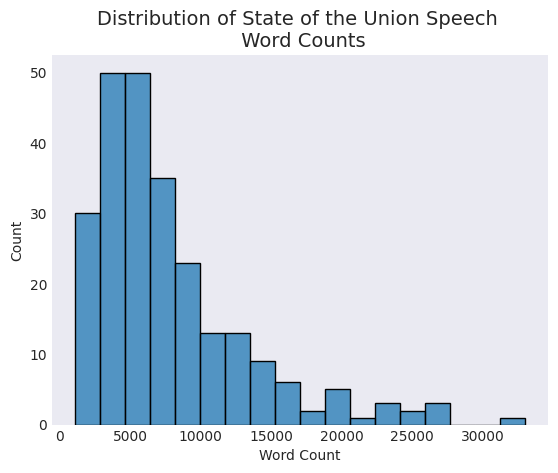

In [22]:
# Hint - try seaborn.histplot()

sns.histplot(sou['Word Count'])
plt.title('Distribution of State of the Union Speech \n Word Counts', fontsize = 14);

#### Word Count Distribution over Year

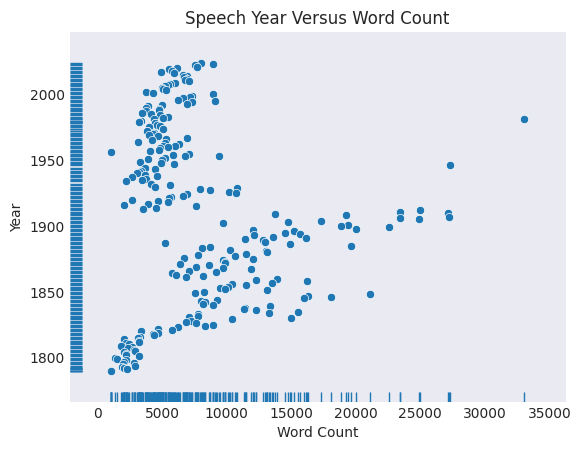

In [23]:
# Hint: try seaborn.rugplot()

sns.scatterplot(data = sou, x = 'Word Count', y = 'Year')
sns.rugplot(data = sou, x = 'Word Count', y = 'Year')
plt.title('Speech Year Versus Word Count', fontsize = 12);

#### Word Count Distribution per President

In [24]:
# Hint: use pandas groupby to get mean word count per president then sort by order

pres_word_count = sou.drop(['Year', 'Text'], axis = 1).groupby('President').mean()
pres_word_count = pres_word_count['Word Count']
pres_word_count = pres_word_count.reindex(pres_order)

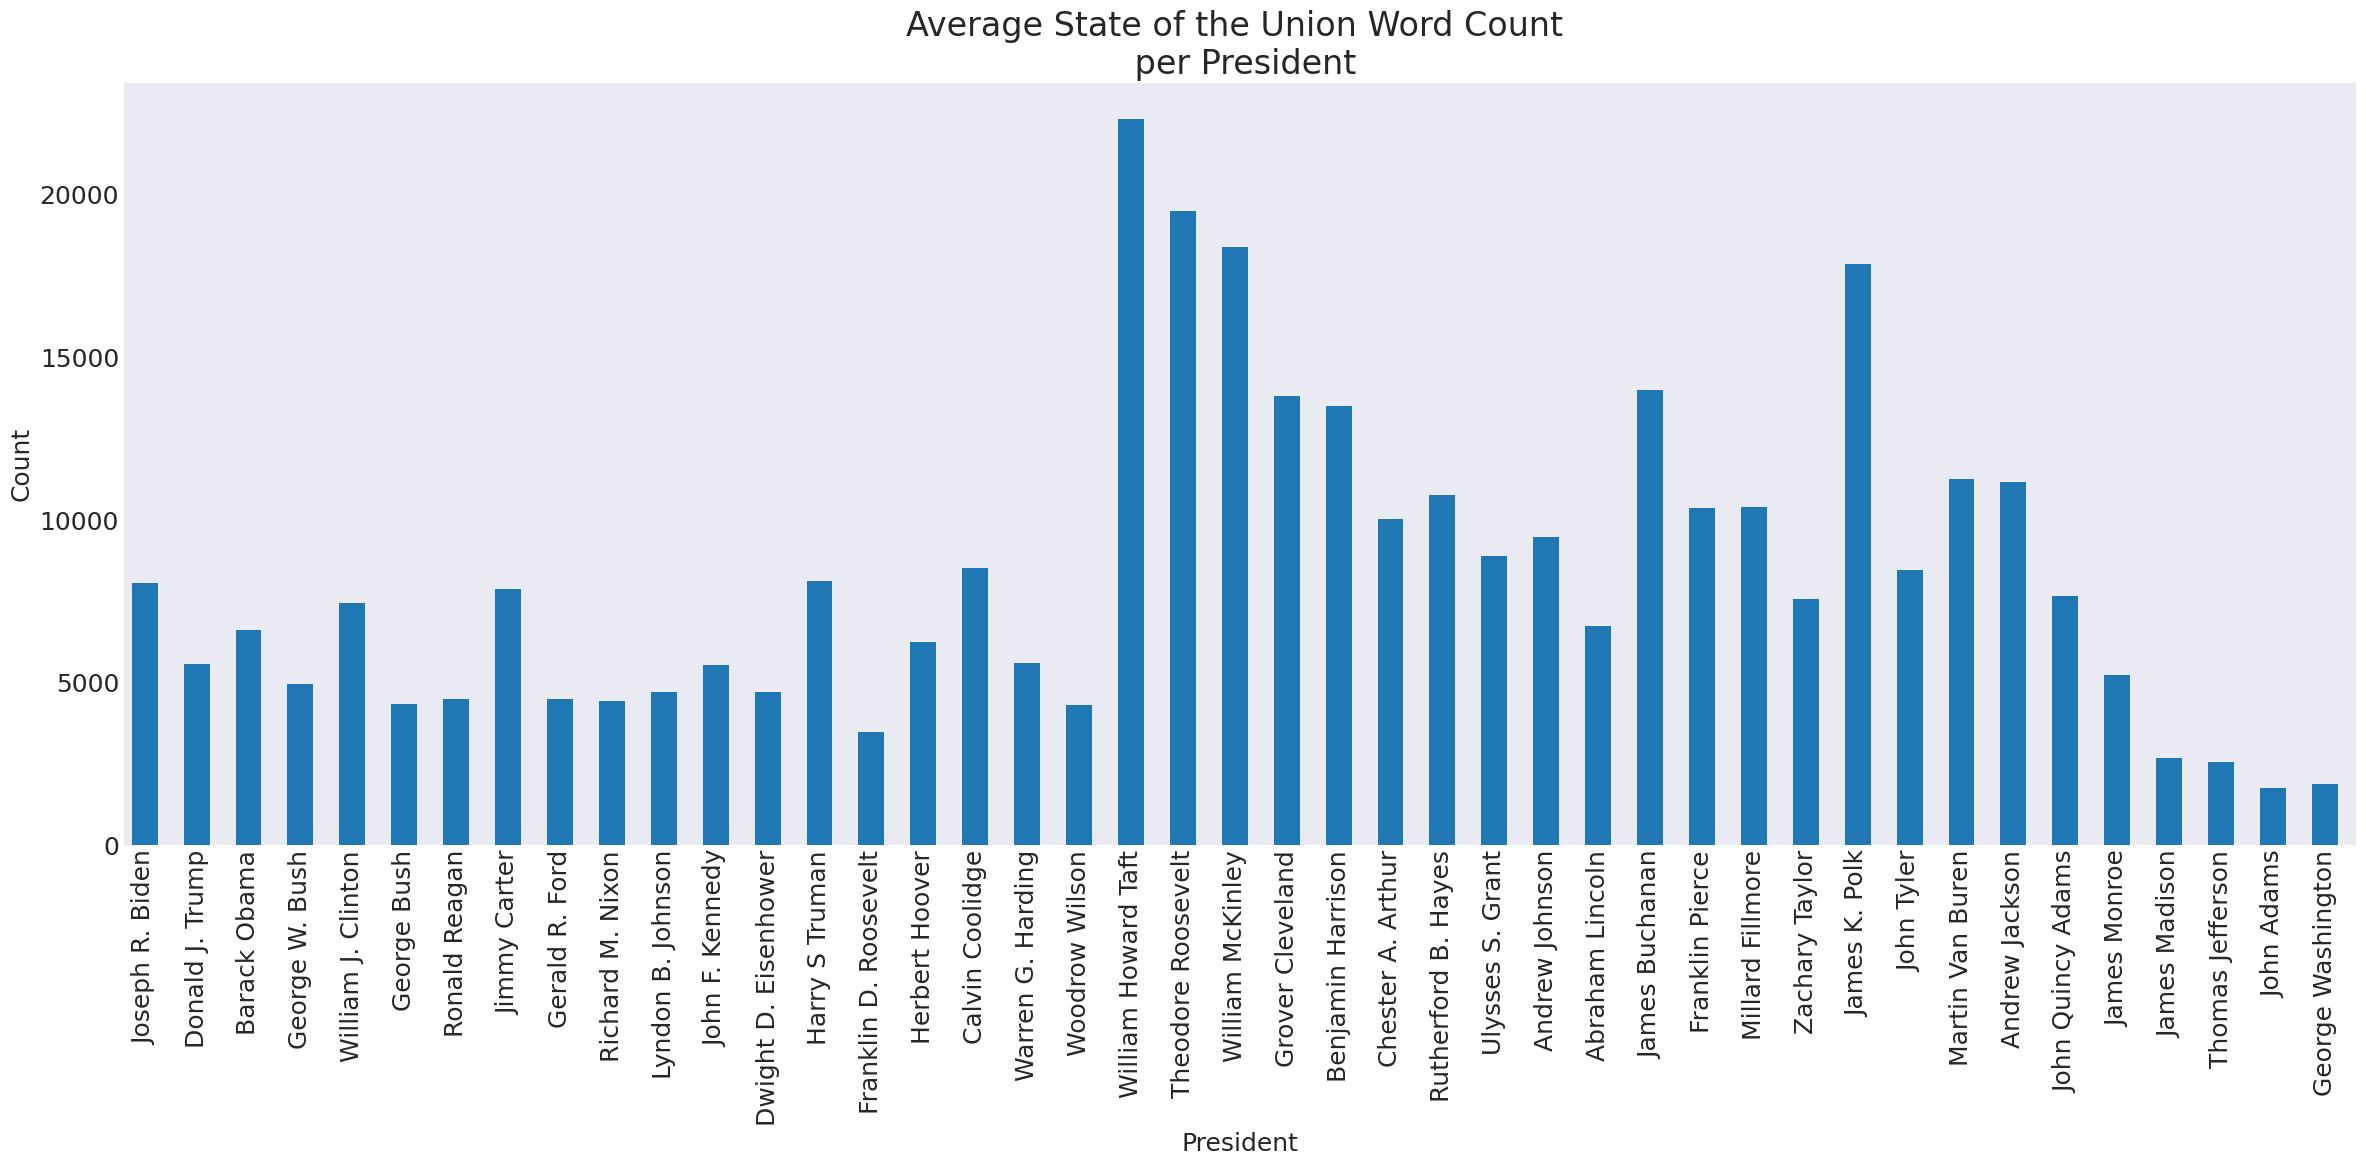

In [25]:
# Plot 
# Hint - use the .plot() method for Pandas Series, make sure all presidents show up on x-axis
plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (24,12))
plt.bar(pres_order, pres_word_count, width = 0.5)
plt.xlabel('President')
plt.xlim(-0.4, len(pres_order) - 0.4) 
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Average State of the Union Word Count \n per President', fontsize = 24)
plt.tight_layout();